# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work
### (5 Marks)

*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | David | Ebede | David Ebede | 3 | 25 |
| Member 2: | Htike Htike | Htoo| Htike Htike Htoo | 3 | 25 |
| Member 3: | May Thinzar | Khine | May Thinzar Khine | 3 | 25 |
| Member 4: | Su Mun | Thet | Su Mun Thet | 3 | 25 |


## Part 1: Printing to the Console
### (6 Marks)

In [ ]:
# In the space below, please print "Hello, World! Welcome to the Student Gradebook Management System."
# (1 mark)
print("Hello, World! Welcome to the Student Gradebook Management System.")

Hello, World! Welcome to the Student Gradebook Management System.


In [ ]:
# Fill in your information using the defined variables below:
# (1 mark)
lab_group_number = "L12"
intake_year = 2024
intake_semester = "Fall" #"Fall" or "Winter"

# Using f-strings and the variables above, print "This is implemented by Group <lab_group_number>, for ENGG680 <intake_semester> of <intake_year>"
# (2 marks)
print(f"This is implemented by Group {lab_group_number}, for ENGG680 {intake_semester} of {intake_year}")

This is implemented by Group L12, for ENGG680 Fall of 2024


In [ ]:
# Use indexing to print "The subjects involved in this grading system is English and Math." using "subjects" below.
# (2 marks)
subjects = ("English", "Math")

In [ ]:
subjects = ("English", "Math")
print (f"The subjects involved in this grading system are {subjects[0]} and {subjects[1]}")

The subjects involved in this grading system are English and Math


## Part 2: Using Pandas for Data Management and Analytics
### (20 marks)

In [131]:
# In the space below, please import the Pandas library
# (1 mark)
import pandas as pd

In [132]:
# Load the student grade CSV files into DataFrames using the defined variables
# (2 marks)
# Define variables for the CSV file paths
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
student_grades_english = "/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_English.csv"
student_grades_math = "/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_Math.csv"
df_english = pd.read_csv(student_grades_english)
df_math = pd.read_csv(student_grades_math)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
# Merging the DataFrames on 'studentID'
df_studentGrades = pd.merge(df_english, df_math, on='studentID', suffixes=('_English', '_Math'))

In [133]:
df_studentGrades = pd.merge(df_english, df_math, on='studentID', suffixes=('_English', '_Math'))

In [ ]:
# Take a look at the data contained in the csv files. Why is studentID chosen as the key?
# (1 mark)
# Student ID is chosen as the key because it is the unique information which identifies each student's grading across different subjects. By using the Student ID as the key, data duplication and errors are avoided, ensuring that all student information is correctly maintained under the corresponding ID.

In [134]:
# Let's calculate the average GPA across the two classes for each student
df_studentGrades['GPA'] = df_studentGrades[['grade_English', 'grade_Math']].mean(axis=1)
# Now let's check the data! In the space below, please use the .head method to display the dataframe.
# (1 mark)
# print (df_studentGrades.head())

In [ ]:
# Do you notice a problem? The rows for first name and last name have been duplicated!
# .drop(columns=['<column_name1>','<column_name2>'] is a Pandas method that can be used to drop columns.
# In the space below, drop the first name and last name associated with the math .csv file.
# (2 mark)
df_studentGrades =

In [163]:
print(df_studentGrades.columns)

Index(['firstName', 'lastName', 'studentID', 'englishGrade', 'mathGrade',
       'GPA'],
      dtype='object')


In [170]:
df_studentGrades = df_studentGrades.drop(columns=['firstName_Math', 'lastName_Math'], errors='ignore')

In [136]:
# Let's display the data again. Use an appropriate method (hint: already used before)
# (1 mark)
print (df_studentGrades.head())>

  firstName_English lastName_English  studentID  grade_English  grade_Math  \
0              Emma            Smith      10959             95          90   
1            Sophia         Robinson      75175             88          95   
2              Emma           Taylor      42257             87          85   
3             David         Robinson      55148             86          87   
4           Stephen            Curry      30303             90          88   

    GPA  
0  92.5  
1  91.5  
2  86.0  
3  86.5  
4  89.0  


In [113]:
# Let's also rename the first and last names appropriately.
# Complete the code in the space below by replacing "<>" with the proper column name
# (1 mark)

df_studentGrades = df_studentGrades.rename(columns={
    'firstName_English': 'firstName',
    '<>': 'lastName',
    '<>': 'englishGrade',
    '<>': 'mathGrade'
    })

In [137]:
df_studentGrades = df_studentGrades.rename(columns={
    'firstName_English': 'firstName',
    'lastName_English': 'lastName',
    'grade_English': 'englishGrade',
    'grade_Math': 'mathGrade'
    })

In [ ]:
# Now let's find out some statistics about our student grades!
# Please use an appropriate Pandas method in the space below to display statistical values like
# mean, standard deviation, min, max, and others.
# (1 mark)
#

In [157]:
df_studentGrades.describe()

,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.00000
mean,86.928571,88.571429,87.75000
std,6.145221,5.918865,3.63609
min,76.000000,79.000000,82.00000
25%,82.500000,85.250000,84.50000
50%,87.500000,87.500000,89.00000
75%,90.750000,91.500000,90.50000
max,98.000000,99.000000,92.50000


In [ ]:
# Do you notice a problem?
# Some statistics are not relevant. The average of studentIDs have no meaning in reality!
# Let's typecast each column appropriately so as to only get meaningful statistics.
# In the code below, replace '<>' by choosing between 'str' for string or 'float' for float
# to properly typecast each column.
# (3 marks)
df_studentGrades['studentID'] = df_studentGrades['studentID'].astype(<>)
df_studentGrades['firstName'] = df_studentGrades['firstName'].astype(<>)
df_studentGrades['lastName'] = df_studentGrades['lastName'].astype(<>)
df_studentGrades['englishGrade'] = df_studentGrades['englishGrade'].astype(<>)
df_studentGrades['mathGrade'] = df_studentGrades['mathGrade'].astype(<>)
df_studentGrades['GPA'] = df_studentGrades['GPA'].astype(<>)

In [156]:
print(df_studentGrades)

df_studentGrades['studentID'] = df_studentGrades['studentID'].astype('str')
df_studentGrades['firstName'] = df_studentGrades['firstName'].astype('str')
df_studentGrades['lastName'] = df_studentGrades['lastName'].astype('str')
df_studentGrades['englishGrade'] = df_studentGrades['englishGrade'].astype('float')
df_studentGrades['mathGrade'] = df_studentGrades['mathGrade'].astype('float')
df_studentGrades['GPA'] = df_studentGrades['GPA'].astype('float')

   firstName  lastName studentID  englishGrade  mathGrade   GPA
0       Emma     Smith     10959          95.0       90.0  92.5
1     Sophia  Robinson     75175          88.0       95.0  91.5
2       Emma    Taylor     42257          87.0       85.0  86.0
3      David  Robinson     55148          86.0       87.0  86.5
4    Stephen     Curry     30303          90.0       88.0  89.0
5   Isabella  Thompson     72824          88.0       79.0  83.5
6    Jasmine     Smith     70385          84.0       80.0  82.0
7      James     Jones     87707          76.0       92.0  84.0
8      Sarah     Swift     61026          80.0       98.0  89.0
9       Anne     Clark     90449          82.0       99.0  90.5
10      Ryan    Thomas     62137          92.0       89.0  90.5
11    Daniel     White     25477          91.0       87.0  89.0
12      Sara       Doe     47991          98.0       86.0  92.0
13   Matthew     White     25376          80.0       85.0  82.5


In [ ]:
# Now let's see our statistics!
df_studentGrades.describe()

In [141]:
df_studentGrades.describe()

,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.00000
mean,86.928571,88.571429,87.75000
std,6.145221,5.918865,3.63609
min,76.000000,79.000000,82.00000
25%,82.500000,85.250000,84.50000
50%,87.500000,87.500000,89.00000
75%,90.750000,91.500000,90.50000
max,98.000000,99.000000,92.50000


In [ ]:
# Now sort the merged dataframe so that it is in descending order based on GPA, and print it
# (1 mark)
df_studentsGPASorted =

In [142]:
df_studentsGPASorted = df_studentGrades.sort_values(by='GPA', ascending=False)
print(df_studentsGPASorted)

   firstName  lastName studentID  englishGrade  mathGrade   GPA
0       Emma     Smith     10959          95.0       90.0  92.5
12      Sara       Doe     47991          98.0       86.0  92.0
1     Sophia  Robinson     75175          88.0       95.0  91.5
9       Anne     Clark     90449          82.0       99.0  90.5
10      Ryan    Thomas     62137          92.0       89.0  90.5
4    Stephen     Curry     30303          90.0       88.0  89.0
8      Sarah     Swift     61026          80.0       98.0  89.0
11    Daniel     White     25477          91.0       87.0  89.0
3      David  Robinson     55148          86.0       87.0  86.5
2       Emma    Taylor     42257          87.0       85.0  86.0
7      James     Jones     87707          76.0       92.0  84.0
5   Isabella  Thompson     72824          88.0       79.0  83.5
13   Matthew     White     25376          80.0       85.0  82.5
6    Jasmine     Smith     70385          84.0       80.0  82.0


In [ ]:
# If we wanted to access the student with the highest gpa based on df_studentsGPASorted,
# does .iloc or .loc make more sense and why?
# (2 marks)
# .iloc makes more sense because it shows the position of the index with integer, which is really appropriate for the number data like GPA or grades.

In [ ]:
# Now using the method you specified, assign the variable below to the row containing the student with the highest GPA
# (1 mark)
top_student =

In [143]:
top_student = df_studentsGPASorted.iloc[0]

In [ ]:
# Now print the student first name and last name with the highest GPA in this format:
# "The student with the highest GPA is <firstName> <lastName> with a GPA of <GPA>"
# (1 mark)
#

In [144]:
print(f"The student with the highest GPA is {top_student['firstName']} {top_student['lastName']} with a GPA of {top_student['GPA']}")

The student with the highest GPA is Emma Smith with a GPA of 92.5


In [ ]:
# We can use logical expressions to filter and print data. For example, let's print the students with math grades higher than 90:
df_mathGrade_over90 = df_studentsGPASorted[df_studentsGPASorted['mathGrade'] > 90]
print(df_mathGrade_over90)

In [145]:
df_mathGrade_over90 = df_studentsGPASorted[df_studentsGPASorted['mathGrade'] > 90]
print(df_mathGrade_over90)

  firstName  lastName studentID  englishGrade  mathGrade   GPA
1    Sophia  Robinson     75175          88.0       95.0  91.5
9      Anne     Clark     90449          82.0       99.0  90.5
8     Sarah     Swift     61026          80.0       98.0  89.0
7     James     Jones     87707          76.0       92.0  84.0


In [ ]:
# Now print the students whos GPA are lower than 85
# (2 marks)
#

In [146]:
df_GPA_lower85 = df_studentsGPASorted[df_studentsGPASorted['GPA'] < 85]
print(df_GPA_lower85)

   firstName  lastName studentID  englishGrade  mathGrade   GPA
7      James     Jones     87707          76.0       92.0  84.0
5   Isabella  Thompson     72824          88.0       79.0  83.5
13   Matthew     White     25376          80.0       85.0  82.5
6    Jasmine     Smith     70385          84.0       80.0  82.0


## Part 3: More Data Analytics using Pandas
### (20 marks)

In [ ]:
# Select the column 'grade' from the original English grade dataset and print it
# (1 mark)
#

In [147]:
column_grade = df_english['grade']
print(column_grade)

0     95
1     88
2     87
3     86
4     90
5     88
6     84
7     76
8     80
9     82
10    92
11    91
12    98
13    80
Name: grade, dtype: int64


In [ ]:
# Select the column 'GPA' from the df_studentGrades and print it
# (1 mark)
#

In [148]:
column_GPA = df_studentGrades['GPA']
print(column_GPA)

0     92.5
1     91.5
2     86.0
3     86.5
4     89.0
5     83.5
6     82.0
7     84.0
8     89.0
9     90.5
10    90.5
11    89.0
12    92.0
13    82.5
Name: GPA, dtype: float64


In [ ]:
# What is the data type of grade from the English grade dataset?
# (0.5 mark)
#int64

# What is the data type of GPA from the merged dataset?
# (0.5 mark)
# float64

# Is it different? Why?
# (1 mark)
# The two data types are different. Because the grading of the subject is the integer data but the GPA is the float data which calculate the average of the combined grades from all subjects, calculated more accurately.

In [ ]:
# Load the student homeroom CSV file into a DataFrame using the following variable name
# (1 mark)
df_homeroom =

In [149]:
student_Homeroom = "/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentHomerooms.csv"
df_homeroom = pd.read_csv(student_Homeroom)

In [ ]:
# Merge the studentHomerooms with the merged dataset. Make sure that the key you are joining on are the same typecast for both datasets.
# Also ensure that there are no redundant columns, and finally display the first few rows.
# Hint: try joining on more than one column to avoid having to drop redundant columns, ie. on=['studentID', '<ColumnA>', '<ColumnB>'] ...
# (5 marks)
#

In [150]:
df_studentGrades ['studentID'] = df_studentGrades ['studentID'].astype(str)
df_homeroom ['studentID'] = df_homeroom ['studentID'].astype(str)
print (pd.merge(df_studentGrades, df_homeroom, on=['studentID', 'firstName', 'lastName']).head())

  firstName  lastName studentID  englishGrade  mathGrade   GPA  homeRoom
0      Emma     Smith     10959          95.0       90.0  92.5       313
1    Sophia  Robinson     75175          88.0       95.0  91.5       311
2      Emma    Taylor     42257          87.0       85.0  86.0       311
3     David  Robinson     55148          86.0       87.0  86.5       313
4   Stephen     Curry     30303          90.0       88.0  89.0       313


In [ ]:
# The code below calculates the mean of each homeroom class.
df_grouped = df_studentInfo.groupby('homeRoom')['GPA'].mean()

# Which homeroom has a higher GPA?
# (1 mark)
# Homeroom 311 has a higher GPA.

In [77]:
df_studentInfo = pd.merge(df_studentGrades, df_homeroom, on=['studentID', 'firstName', 'lastName'])
df_grouped = df_studentInfo.groupby('homeRoom')['GPA'].mean()
print (df_grouped)

homeRoom
311    88.785714
313    86.714286
Name: GPA, dtype: float64


In [ ]:
# Now let's work with multiple sorts. The .sort_values() method can sort by multiple columns, meaning you can specify a primary column and a secondary column for sorting.
# For example, by=['ColumnA', 'ColumnB'] will first sort by ColumnA and then by ColumnB.
# Create and print a DataFrame, df_studentsGPASorted_homeroom, which is sorted by homeRoom and then by GPA, both in descending order.
# (3 mark)

In [173]:
df_studentsGPASorted_homeroom = df_studentInfo.sort_values(by=['homeRoom', 'GPA'], ascending=[True, False])
print (df_studentsGPASorted_homeroom)

   firstName  lastName studentID  englishGrade   GPA  homeRoom
12      Sara       Doe     47991          98.0  92.0       311
1     Sophia  Robinson     75175          88.0  91.5       311
9       Anne     Clark     90449          82.0  90.5       311
8      Sarah     Swift     61026          80.0  89.0       311
11    Daniel     White     25477          91.0  89.0       311
2       Emma    Taylor     42257          87.0  86.0       311
5   Isabella  Thompson     72824          88.0  83.5       311
0       Emma     Smith     10959          95.0  92.5       313
10      Ryan    Thomas     62137          92.0  90.5       313
4    Stephen     Curry     30303          90.0  89.0       313
3      David  Robinson     55148          86.0  86.5       313
7      James     Jones     87707          76.0  84.0       313
13   Matthew     White     25376          80.0  82.5       313
6    Jasmine     Smith     70385          84.0  82.0       313


In [101]:
print(df_studentsGPASorted_homeroom.columns)

Index(['firstName', 'lastName', 'studentID', 'englishGrade', 'GPA',
       'homeRoom'],
      dtype='object')


In [174]:
pd.set_option('display.max_columns', None)
print(df_studentsGPASorted_homeroom)

   firstName  lastName studentID  englishGrade   GPA  homeRoom
12      Sara       Doe     47991          98.0  92.0       311
1     Sophia  Robinson     75175          88.0  91.5       311
9       Anne     Clark     90449          82.0  90.5       311
8      Sarah     Swift     61026          80.0  89.0       311
11    Daniel     White     25477          91.0  89.0       311
2       Emma    Taylor     42257          87.0  86.0       311
5   Isabella  Thompson     72824          88.0  83.5       311
0       Emma     Smith     10959          95.0  92.5       313
10      Ryan    Thomas     62137          92.0  90.5       313
4    Stephen     Curry     30303          90.0  89.0       313
3      David  Robinson     55148          86.0  86.5       313
7      James     Jones     87707          76.0  84.0       313
13   Matthew     White     25376          80.0  82.5       313
6    Jasmine     Smith     70385          84.0  82.0       313


In [ ]:
# Do you notice a problem with the indices? They are basically meaningless now that we have sorted by homeroom and GPA.

# The code below changes the index of the dataframe so that it is more intuitive.
df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1
df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])

print(df_studentsGPASorted_homeroom)

In [153]:
df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1
df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])
print (df_studentsGPASorted_homeroom)

         firstName  lastName studentID  englishGrade   GPA  homeRoom
newIndex                                                            
311-1         Sara       Doe     47991          98.0  92.0       311
311-2       Sophia  Robinson     75175          88.0  91.5       311
311-3         Anne     Clark     90449          82.0  90.5       311
311-4        Sarah     Swift     61026          80.0  89.0       311
311-5       Daniel     White     25477          91.0  89.0       311
311-6         Emma    Taylor     42257          87.0  86.0       311
311-7     Isabella  Thompson     72824          88.0  83.5       311
313-1         Emma     Smith     10959          95.0  92.5       313
313-2         Ryan    Thomas     62137          92.0  90.5       313
313-3      Stephen     Curry     30303          90.0  89.0       313
313-4        David  Robinson     55148          86.0  86.5       313
313-5        James     Jones     87707          76.0  84.0       313
313-6      Matthew     White     2

In [ ]:
# Describe what each coding line in the cell above is doing
# (4 marks)


In [ ]:
#df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1
#The first line creates a new column "student rank" that assigns sequencial rank to each student within their respective "homeroom", count from 1.
#df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)
#The second line a new column "new index" that combine "homeRoom" and "StudentsGPASorted homeroom, Student Rank" by separating with '_' into string format.
#df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')
#The third line set a new index column of Dataframe index which allows more meaningful row labels based on homeroom and rank.
#df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])
#The last one removes the Student Rank column from data frame after creating new index, as it is not needed anymore due to the new index.

In [ ]:
# Given df_studentsGPASorted_homeroom, please find and print the students with the highest GPA in each homeroom using the .loc method.
# (2 marks)
#

In [80]:
print (df_studentsGPASorted_homeroom.loc[df_studentsGPASorted_homeroom.groupby('homeRoom')['GPA'].idxmax()])

         firstName lastName studentID  englishGrade   GPA  homeRoom
newIndex                                                           
311-1         Sara      Doe     47991          98.0  92.0       311
313-1         Emma    Smith     10959          95.0  92.5       313


## Part 4: Using Matplotlib for Data Analytics
### (14 marks)

In [ ]:
# In the space below, please import the matplotlib library
# (1 mark)


In [81]:
import matplotlib.pyplot as plt

In [ ]:
# Let's use matplotlib to display a histogram of the grades distribution
# Histograms are useful for seeing the distribution of the students grades

plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['englishGrade'], bins=10, alpha=0.7, label='English Grades', color='blue')

# Step 1: Use the line above as reference to create a histogram for the math grades
# (1 mark)
#

# Step 2: Ensure that your plot is descriptive, so use labels (x and y axis), a title, and a legend.
# Hint: Use the matplotlib .legend(loc='<location>') to add and place the legend.
# You can use 'upper left', 'upper right', 'lower left', and 'lower right' to specify the location.
# (4 marks)
#
plt.grid(True)

# Step 3: Use the .savefig('<image_title>'.png) to output an image file of the histogram.
# Please be sure to use a descriptive title!
# (1 mark)
#

plt.show()

(array([1., 2., 1., 1., 1., 3., 2., 1., 1., 1.]),
 array([76. , 78.2, 80.4, 82.6, 84.8, 87. , 89.2, 91.4, 93.6, 95.8, 98. ]),
 <BarContainer object of 10 artists>)

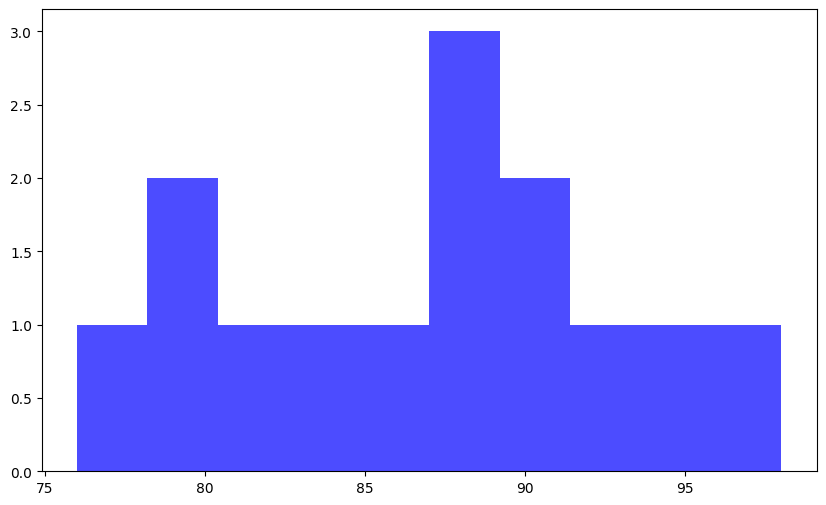

In [89]:
plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['englishGrade'], bins=10, alpha=0.7, label='English Grades', color='blue')

In [97]:
print(df_studentGrades.columns)

Index(['firstName', 'lastName', 'studentID', 'englishGrade', 'GPA'], dtype='object')


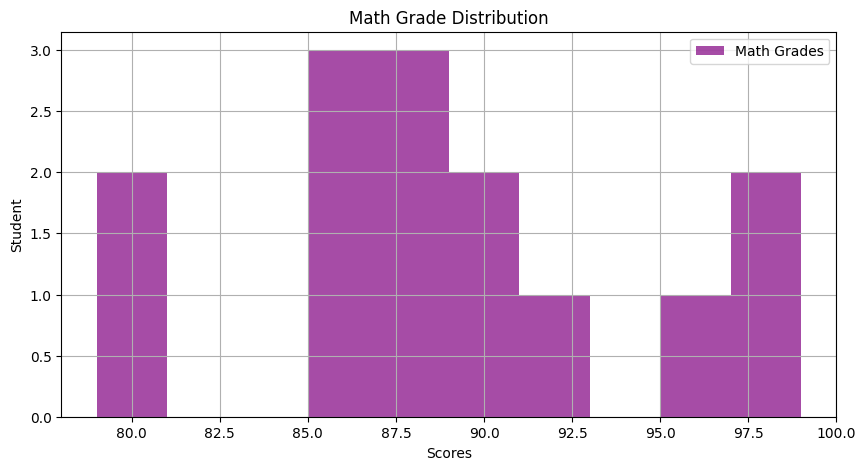

In [172]:
plt.figure(figsize=(10, 5))
plt.hist(df_studentGrades['mathGrade'], bins=10, alpha=0.7, label='Math Grades', color='purple')
plt.xlabel('Scores')
plt.ylabel('Student')
plt.title('Math Grade Distribution')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('math_grading_sheet.png')
plt.show()

In [ ]:
# Let's also use matplotlib to display a scatter plot of English vs. Math grades
# Scatter plots are useful for seeing the relationship between two variables
plt.figure(figsize=(10, 6))

# Step 1: Use .scatter(x_data, y_data) to create a scatter plot using the English grades on the x-axis, and Math grades on the y-axis
# (2 mark)
#

# Step 1: Properly label the x and y axes as well as the title of your plot.
# (3 marks)
#
plt.grid(True)

# Step 2: Output an image file for the scatter plot with a descriptive file name
# (1 mark)
#

plt.show()

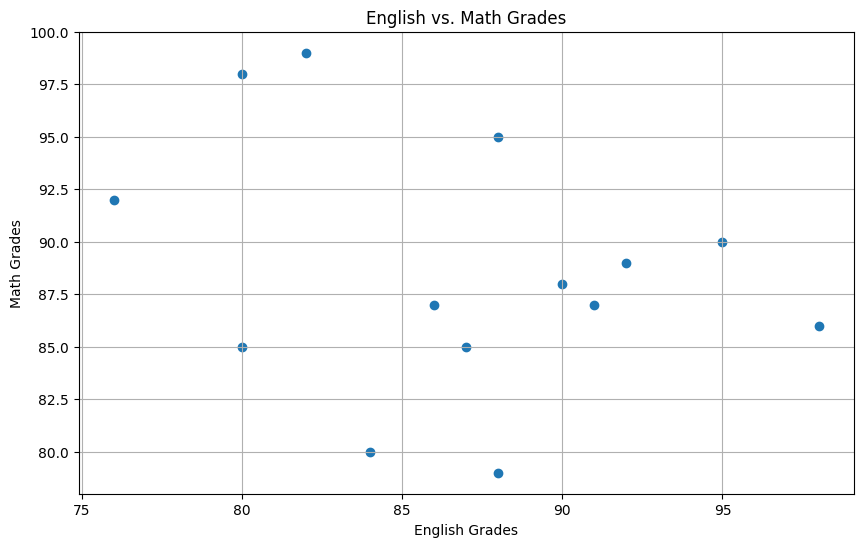

In [176]:
plt.figure(figsize=(10, 6))
plt.scatter(df_studentGrades['englishGrade'], df_studentGrades['mathGrade'])
plt.xlabel('English Grades')
plt.ylabel('Math Grades')
plt.title('English vs. Math Grades')
plt.grid(True)
plt.savefig('english_math_grading_sheet.png')
plt.show()

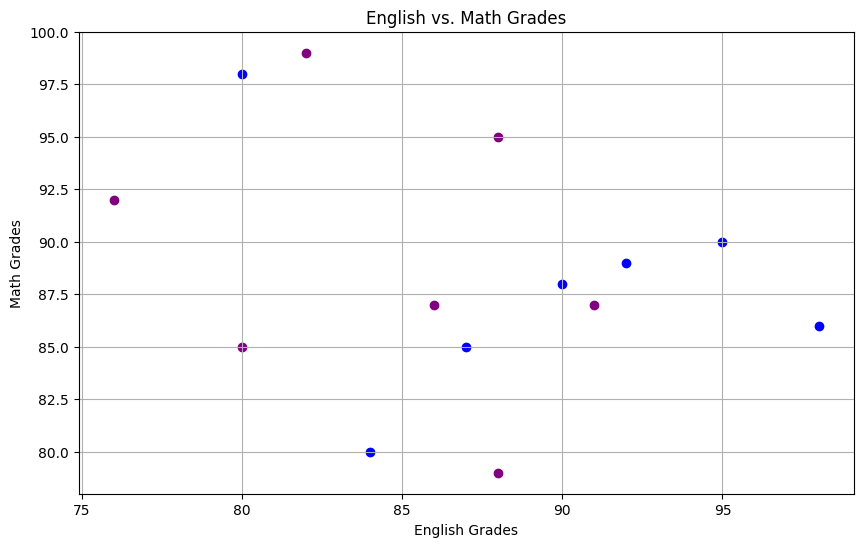

In [181]:
plt.figure(figsize=(10, 6))
for i in range(len(df_studentGrades)):
  if i % 2 == 0:
    plt.scatter(df_studentGrades['englishGrade'][i], df_studentGrades['mathGrade'][i], color='blue')
  else:
    plt.scatter(df_studentGrades['englishGrade'][i], df_studentGrades['mathGrade'][i], color='purple')
plt.xlabel('English Grades')
plt.ylabel('Math Grades')
plt.title('English vs. Math Grades')
plt.grid(True)
plt.savefig('english_math_grading_sheet.png')
plt.show()

In [ ]:
# From the scatter plot, is there a relationship between the Math and English grades?
# (1 mark)
#

In [184]:
convariance = df_studentGrades['englishGrade'].corr(df_studentGrades['mathGrade'])
print(f'Convariance between mathGrade and englishGrade is {convariance}')
print('There is invisible negative convariance between mathGrade and englishGrade')

Convariance between mathGrade and englishGrade is -0.2737227327533567
There is invisible negative convariance between mathGrade and englishGrade
